<a href="https://colab.research.google.com/github/kdj0712/study_AIs/blob/main/docs/quests/NLPs/wordcloud_regexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install soynlp

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import matplotlib.font_manager as fm
# 설치된 폰트 중 'NanumGothic' 찾기
for font in fm.fontManager.ttflist:
    if 'NanumGothic' in font.name:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['axes.unicode_minus'] = False

## Read excel file with sheets

In [2]:
df_OWG = pd.read_excel('OneWord_Game.xlsx',sheet_name=None)

In [3]:
df_sheets = []
for sheet_name,df in df_OWG.items():
  df_sheets.append(df)
  print(f'{sheet_name},{type(df)}')
  pass
len(df_sheets)

2월,<class 'pandas.core.frame.DataFrame'>
1월,<class 'pandas.core.frame.DataFrame'>
12월,<class 'pandas.core.frame.DataFrame'>


3

In [4]:
len(df_sheets)

3

In [5]:
df_sheets[2][:2]

,,12월 29일,12월 28일,12월 27일,12월 26일,12월 22일,12월 21일,12월 20일,12월 19일,12월 18일,12월 15일,12월 14일,12월 13일,12월 12일,12월 11일
0,문석천,browser.switch_to.frame()\nframe 되어 있는 html 정보...,back()\n브라우저의 현재 페이지에서 이전 페이지로 돌아가게 하는 functio...,$inc\nmongoDB 내에서 필드 안의 value를 증가시킬때 사용되는 연산자이다.,parsing\n문서나 html 등에서 특정한 패턴이나 문자를 추출해 가공하는 방법이다.,wget\n웹크롤링의 단계 중 하나로 브라우저의 URL을 커맨드(터미널)에 입력하여...,self\nClass 내에서 모든 resource를 사용할때 class의 구성인자라...,$eq\ncollection에서 특정 key값과 일치하는 정보를 찾아낼 때 사용하며...,updateOne()\ndatabase의 collection 내 특정 key에 해당...,$ in\nMongo DB에서 사용되는 연산자로 리스트 내 특정 키워드 값이 들어있...,$Find\ndatabase의 collection 내 특정 key에 해당하는 val...,Docker desktop\n하나의 데스크탑에서 또다른 OS나 다른 버전의 프로그램...,import\n다른 파일에서 class와 그 안에 있는 function들을 불러올 ...,__init__\nclass가 생성될때 자동적으로 생성되는 function이며 cl...,merge chages\npull을 할 때 또다른 공유 사용자와 작업내용이 다를 경...
1,김유진,selector\n스타일을 적용하고자하는 HTML 요소를 셀렉터로 특정하고 선택된 ...,"iframe\ninline frame의 약어로, 현재 웹 페이지 내에 다른 html...",time.sleep()\n다음 페이지로 넘어간다는것을 인지하기 위해 속도를 조절하는...,Internet Protocol(IP)\n송신 호스트와 수신 호스트가 네트워크에서 ...,ls\n경로가 아닌 현재 파일과 디렉토리를 보여준다.,Markdown\n텍스트 기반 언어로 쉽게 쓰고 읽을 수 있으며 HTML로 변환이 ...,"웹 스크롤링\n데이터를 가져오는것으로, 방식에는 내부데이터를 가져오는 방식과 외부데...",except\n업무 코드 문제 발생 시 대처하는 코드로 try에서 오류발생시 exc...,update\n데이터를 수정할 때 사용하는 명령어로 updateOne은 하나의 정보...,$inc 연산자\nIncremets라고 불리며 몽고쉘에서 해당 값을 입력하여 몽고d...,"MongoDB\nNoSQL방식으로 데이터 저장을 위해서 사용하는 툴이며, 데이터베이...","dictionary\nkey와 value를 한 쌍으로 가지는 자료형이며, 리스트처럼...","논리연산자\n논리적으로 연산자 값을 뽑아내는데 and, or, not을 활용할 수 있다.",git 충돌 방지\n두 명이상의 작업자가 동일 파일에서 동시 작업 시 충돌이 일어날...


In [6]:
first = df_sheets[0].iloc[10]
second = df_sheets[1].iloc[10]
third = df_sheets[2].iloc[10]

In [7]:
first = first.dropna()
second = second.dropna()
third = third.dropna()

In [8]:
concat_data = pd.concat(objs=[first,second,third])

In [9]:
listed_data= []
for x in concat_data:
  listed_data.append(x)
  pass
listed_data

['김덕재',
 'sampling\n분류모델에서 Dataset 비율이 차이나는 경우 비율을 맞추기 위해 데이터를 정리하는 과정\n데이터의 비율 격차가 심해 모델의 신뢰도가 의심 될 경우, 그것을 조정하기 위해 사용',
 'MSE(Mean Squared Error)\n모델의 성능을 평가하는 산출방법\n오차의 제곱의 평균을 구해서 값을 산출한다.',
 'NumPy\n수학 및 과학 연산을 위한 파이썬 패키지이다\n판다스나 다른 패키지 등과의 조합을 수월하게 하고, 행렬의 연산을 기존 방식보다 간편하게 할 수 있게 하기위해 생겨났다.',
 'anderson-darling test\n분석을 하고자 하는 데이터의 분포도를 확인하는 검사기법\n정규분포인 경우 levene 검사를 통해 등분산/이분산 여부를 파악한 뒤 다음 프로세스를 진행하고, 비정규 분포일 경우 범주가 두가지라면 ttest를, 3가지 이상이라면 kruskal검사를 진행한다',
 '귀무가설\n데이터 분석에서 어떠한 가설을 수립하였을 때 그 가설이 유의미하지 않을 것이라는 전제를 가진 가설',
 'Pandas Concat\n데이터 프레임 기준 같은 컬럼끼리 이어 붙이는 명령어\n컬럼의 키값이 같다면 시리즈이거나 데이터프레임이거나 관계 없이 이어 붙일 수 있다',
 '전처리\n데이터 분석을 하기 전에 결측치를 확인하고 처리하는 과정\n결측치를 확인한 뒤 이 데이터의 여부에 따라 이를 제거하거나 또는 유사한 데이터로 치환하므로써 분석에 대한 정확도를 높일 수 있도록 하는 과정 ',
 'query()\nDataFrame에서 특정 조건에 맞는 행들을 선택할 때 사용하는 함수\n여러 조건을 복합적으로 적용하는 것이 가능하게 하고, 구문을 간결하게 만들어 가독성이 좋게 만들 수 있다.',
 '김덕재',
 'datetime\n시간체계를 다루는 별도의 데이터 타입\n시간은 다른 계산방식을 갖고 있으므로 그것이 일반적인 수치형이나 범주형 데이터와 혼용되어 잘못된 결과를 도출하지 않도록 별도의 데이터 타입을 구축',
 'loc 

In [10]:
merged_data = ' '.join(listed_data)
merged_data

'김덕재 sampling\n분류모델에서 Dataset 비율이 차이나는 경우 비율을 맞추기 위해 데이터를 정리하는 과정\n데이터의 비율 격차가 심해 모델의 신뢰도가 의심 될 경우, 그것을 조정하기 위해 사용 MSE(Mean Squared Error)\n모델의 성능을 평가하는 산출방법\n오차의 제곱의 평균을 구해서 값을 산출한다. NumPy\n수학 및 과학 연산을 위한 파이썬 패키지이다\n판다스나 다른 패키지 등과의 조합을 수월하게 하고, 행렬의 연산을 기존 방식보다 간편하게 할 수 있게 하기위해 생겨났다. anderson-darling test\n분석을 하고자 하는 데이터의 분포도를 확인하는 검사기법\n정규분포인 경우 levene 검사를 통해 등분산/이분산 여부를 파악한 뒤 다음 프로세스를 진행하고, 비정규 분포일 경우 범주가 두가지라면 ttest를, 3가지 이상이라면 kruskal검사를 진행한다 귀무가설\n데이터 분석에서 어떠한 가설을 수립하였을 때 그 가설이 유의미하지 않을 것이라는 전제를 가진 가설 Pandas Concat\n데이터 프레임 기준 같은 컬럼끼리 이어 붙이는 명령어\n컬럼의 키값이 같다면 시리즈이거나 데이터프레임이거나 관계 없이 이어 붙일 수 있다 전처리\n데이터 분석을 하기 전에 결측치를 확인하고 처리하는 과정\n결측치를 확인한 뒤 이 데이터의 여부에 따라 이를 제거하거나 또는 유사한 데이터로 치환하므로써 분석에 대한 정확도를 높일 수 있도록 하는 과정  query()\nDataFrame에서 특정 조건에 맞는 행들을 선택할 때 사용하는 함수\n여러 조건을 복합적으로 적용하는 것이 가능하게 하고, 구문을 간결하게 만들어 가독성이 좋게 만들 수 있다. 김덕재 datetime\n시간체계를 다루는 별도의 데이터 타입\n시간은 다른 계산방식을 갖고 있으므로 그것이 일반적인 수치형이나 범주형 데이터와 혼용되어 잘못된 결과를 도출하지 않도록 별도의 데이터 타입을 구축 loc \n데이터프레임에서 실제 명칭을 통해 위치를 찾는 함수,\n레코드와 컬럼의 명칭을

In [11]:
import re
patterns = '(으로 |에서의 |있다|에 |로 |은 |하는 |이 |가 |과 |는 |되고 |등 |의 |를 |을 |하며|며 |데 |\.|\,|\n|있 |김덕재)'
text_regex = re.sub(pattern=patterns, repl=' ', string=merged_data)
text_regex

'  sampling 분류모델에서 Dataset 비율 차이나 경우 비율 맞추기 위해 데이터 정리 과정 데이터 비율 격차 심해 모델 신뢰도 의심 될 경우  그것 조정하기 위해 사용 MSE(Mean Squared Error) 모델 성능 평가 산출방법 오차 제곱 평균 구해서 값 산출한다  NumPy 수학 및 과학 연산 위한 파이썬 패키지이다 판다스나 다른 패키지 등과 조합 수월하게 하고  행렬 연산 기존 방식보다 간편하게 할 수 있게 하기위해 생겨났다  anderson-darling test 분석 하고자  데이터 분포도 확인 검사기법 정규분포인 경우 levene 검사 통해 등분산/이분산 여부 파악한 뒤 다음 프로세스 진행하고  비정규 분포일 경우 범주 두가지라면 ttest를  3가지 이상이라면 kruskal검사 진행한다 귀무가설 데이터 분석에서 어떠한 가설 수립하였 때 그 가설 유의미하지 않 것이라 전제 가진 가설 Pandas Concat 데이터 프레임 기준 같 컬럼끼리 이어 붙이 명령어 컬럼 키값 같다면 시리즈이거나 데이터프레임이거나 관계 없 이어 붙일 수   전처리 데이터 분석 하기 전 결측치 확인하고 처리 과정 결측치 확인한 뒤  데이터 여부 따라 이 제거하거나 또 유사한 데이터 치환하므로써 분석 대한 정확도 높일 수 있도록  과정  query() DataFrame에서 특정 조건 맞 행들 선택할 때 사용 함수 여러 조건 복합적 적용 것 가능하게 하고  구문 간결하게 만들어 가독성 좋게 만들 수      datetime 시간체계 다루 별도 데이터 타입 시간 다른 계산방식 갖고 있으므 그것 일반적인 수치형이나 범주형 데이터와 혼용되어 잘못된 결과 도출하지 않도록 별도 데이터 타입 구축 loc  데이터프레임에서 실제 명칭 통해 위치 찾 함수  레코드와 컬럼 명칭 통해 해당 값 가져올 수    데이터 양 많아졌 경우 인덱스 내 원 값 가져오기 어려울 수 있기 때문 직관적인 위치영역 가져오기 편하게 하기 위함이다 astype 판다스에서 기존 데이터 특성 변환하고자 할 

In [12]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white'
                      ,font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

In [13]:
text_split = text_regex.split()
text_split[:2], len(text_split)

(['sampling', '분류모델에서'], 802)

In [14]:
from collections import Counter
text_split_counter = Counter(text_split)

In [15]:
text_split_counter

Counter({'sampling': 1,
         '분류모델에서': 1,
         'Dataset': 1,
         '비율': 3,
         '차이나': 1,
         '경우': 8,
         '맞추기': 1,
         '위해': 9,
         '데이터': 21,
         '정리': 1,
         '과정': 3,
         '격차': 1,
         '심해': 1,
         '모델': 3,
         '신뢰도': 1,
         '의심': 1,
         '될': 1,
         '그것': 3,
         '조정하기': 1,
         '사용': 9,
         'MSE(Mean': 1,
         'Squared': 1,
         'Error)': 1,
         '성능': 1,
         '평가': 1,
         '산출방법': 1,
         '오차': 1,
         '제곱': 1,
         '평균': 1,
         '구해서': 1,
         '값': 8,
         '산출한다': 1,
         'NumPy': 1,
         '수학': 1,
         '및': 1,
         '과학': 1,
         '연산': 2,
         '위한': 1,
         '파이썬': 2,
         '패키지이다': 1,
         '판다스나': 1,
         '다른': 4,
         '패키지': 1,
         '등과': 1,
         '조합': 1,
         '수월하게': 1,
         '하고': 2,
         '행렬': 1,
         '기존': 3,
         '방식보다': 1,
         '간편하게': 1,
         '할': 6,
         '

In [16]:
text_split_counter_30 = text_split_counter.most_common(30)
text_split_counter_30

[('수', 26),
 ('데이터', 21),
 ('있도록', 11),
 ('위해', 9),
 ('사용', 9),
 ('있', 9),
 ('경우', 8),
 ('값', 8),
 ('것', 7),
 ('기능', 7),
 ('할', 6),
 ('때', 6),
 ('다른', 4),
 ('같', 4),
 ('컬럼', 4),
 ('사용자', 4),
 ('가능한', 4),
 ('직접', 4),
 ('관리', 4),
 ('비율', 3),
 ('과정', 3),
 ('모델', 3),
 ('그것', 3),
 ('기존', 3),
 ('분석', 3),
 ('통해', 3),
 ('뒤', 3),
 ('가설', 3),
 ('그', 3),
 ('않', 3)]

In [17]:
new_dict = {key: value for key, value in text_split_counter_30}

In [18]:
new_dict

{'수': 26,
 '데이터': 21,
 '있도록': 11,
 '위해': 9,
 '사용': 9,
 '있': 9,
 '경우': 8,
 '값': 8,
 '것': 7,
 '기능': 7,
 '할': 6,
 '때': 6,
 '다른': 4,
 '같': 4,
 '컬럼': 4,
 '사용자': 4,
 '가능한': 4,
 '직접': 4,
 '관리': 4,
 '비율': 3,
 '과정': 3,
 '모델': 3,
 '그것': 3,
 '기존': 3,
 '분석': 3,
 '통해': 3,
 '뒤': 3,
 '가설': 3,
 '그': 3,
 '않': 3}

In [19]:
text_split_counter_30

[('수', 26),
 ('데이터', 21),
 ('있도록', 11),
 ('위해', 9),
 ('사용', 9),
 ('있', 9),
 ('경우', 8),
 ('값', 8),
 ('것', 7),
 ('기능', 7),
 ('할', 6),
 ('때', 6),
 ('다른', 4),
 ('같', 4),
 ('컬럼', 4),
 ('사용자', 4),
 ('가능한', 4),
 ('직접', 4),
 ('관리', 4),
 ('비율', 3),
 ('과정', 3),
 ('모델', 3),
 ('그것', 3),
 ('기존', 3),
 ('분석', 3),
 ('통해', 3),
 ('뒤', 3),
 ('가설', 3),
 ('그', 3),
 ('않', 3)]

In [20]:
wordcloud.generate_from_frequencies(new_dict)

In [21]:
wordcloud.words_

{'수': 1.0,
 '데이터': 0.8076923076923077,
 '있도록': 0.4230769230769231,
 '위해': 0.34615384615384615,
 '사용': 0.34615384615384615,
 '있': 0.34615384615384615,
 '경우': 0.3076923076923077,
 '값': 0.3076923076923077,
 '것': 0.2692307692307692,
 '기능': 0.2692307692307692,
 '할': 0.23076923076923078,
 '때': 0.23076923076923078,
 '다른': 0.15384615384615385,
 '같': 0.15384615384615385,
 '컬럼': 0.15384615384615385,
 '사용자': 0.15384615384615385,
 '가능한': 0.15384615384615385,
 '직접': 0.15384615384615385,
 '관리': 0.15384615384615385,
 '비율': 0.11538461538461539,
 '과정': 0.11538461538461539,
 '모델': 0.11538461538461539,
 '그것': 0.11538461538461539,
 '기존': 0.11538461538461539,
 '분석': 0.11538461538461539,
 '통해': 0.11538461538461539,
 '뒤': 0.11538461538461539,
 '가설': 0.11538461538461539,
 '그': 0.11538461538461539,
 '않': 0.11538461538461539}

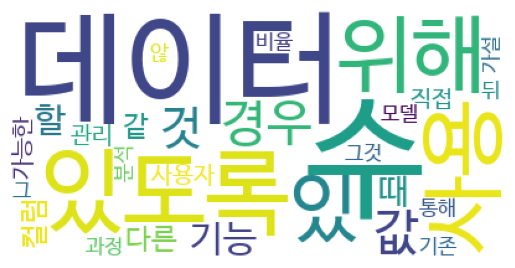

In [22]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis('off')
plt.show()